In [1]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.1.3 #I had to install an older version of matplotlib
                                #because the newest version would not make a correct plot

     |████████████████████████████████| 46.2 MB 1.4 MB/s 
     |████████████████████████████████| 51 kB 6.6 MB/s 
     |████████████████████████████████| 1.4 MB 49.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 295 kB 59.0 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 3.6 MB 42.5 MB/s 
     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 11.2 MB 41.6 MB/s 
     |████████████████████████████████| 895 kB 59.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 6.7 MB 7.1 MB/s 
     |████████████████

In [2]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf #download file

--2022-02-14 18:52:59--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  --.-KB/s    in 0.1s    

2022-02-14 18:52:59 (25.9 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



In [3]:
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1") #loaded data into memory
from gwosc.datasets import event_gps

from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

import gwpy

import matplotlib
import numpy as np

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)
Sampling rate is: 4096.0 Hz
Duration is: 0.000244140625 s


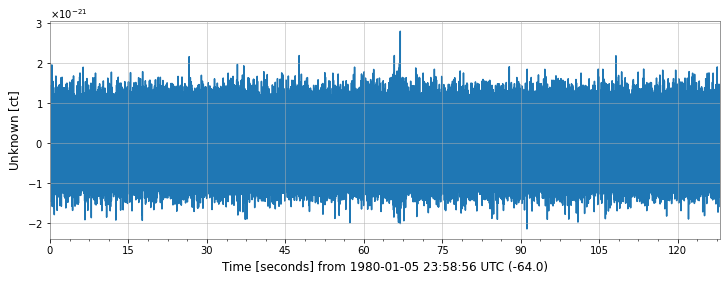

In [4]:
print(gwpy_strain)
print("Sampling rate is:", gwpy_strain.sample_rate) #to see sample rate
print("Duration is:", gwpy_strain.dt) #to see duration
%matplotlib inline
plot = gwpy_strain.plot()
plot.show()

Duration is dt = 0.000244140625 s
Sample rate it 4096.0Hz

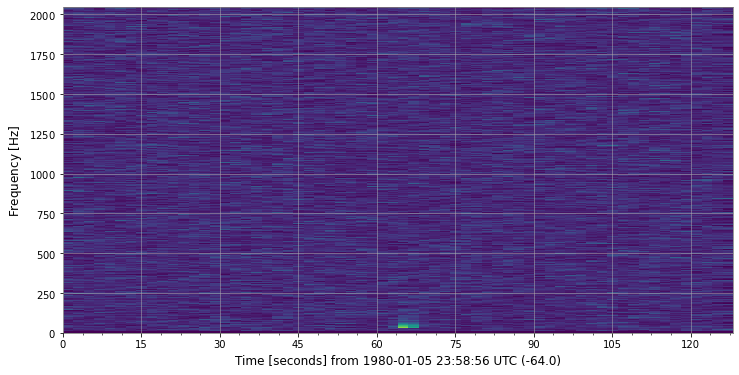

In [5]:
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

In [6]:
print(specgram.min())
print(specgram.max())

#to get a rough idea of the color range starting values




2.014597219342668e-29 ct / Hz(1/2)
7.678955173853572e-23 ct / Hz(1/2)


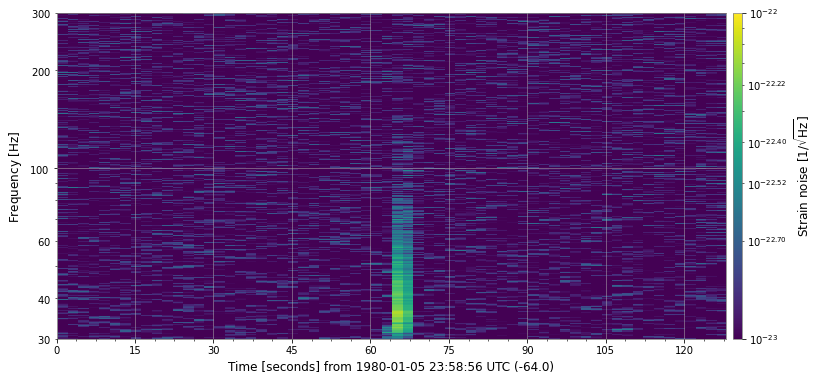

In [7]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(30, 300)
ax.colorbar(
    clim=(1e-23, 1e-22),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

#after testing with many different combinations of color range and ylims, this yielded the best results 
#if I run a previous block this block stops working and I have to restart runtime and run everything
#from scratch or else it just shows error

The peak seems to be at the ~64s mark